In [1]:
import vegas
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**parameters**

In [2]:
N=8
a=.5
Nx=10
A=(1./(2.*math.pi*a))**(N/2.) #normalization

**arrays allocation**

In [3]:
plotx =[None]*(Nx+1)
ploty_num_ho =[None]*(Nx+1)
plot_num_gs_ho=[None]*(Nx+1)
plot_num_gs_aho=[None]*(Nx+1)
ploty_num_aho =[None]*(Nx+1)
plot_num_gs_aho=[None]*(Nx+1)
ploty_an=[None]*(Nx+1)
ploty_an_gs=[None]*(Nx+1)
x =[None]*(Nx+1)

**potentials**

In [4]:
def V_ho(x):
    return .5*x**2
def V_aho(x):
    return .5*x**4


**analytic solution**

In [5]:
def analytic(x):
    return (np.exp(-x**2)/np.sqrt(np.pi)) * np.exp(-1.0 * 1/2 * a * N)

**full integration of harmonic oscillator**

no fixed endpoints, needed for wavefunction evaluation

In [6]:
def f_full_ho(x):
    action =0
    action +=(1/(2*a)) * (x[0]-x[-1])**2 + a * V_ho(x[-1]) 
    for j in range(0,N-1):
        action += (1./(2.*a))*(  (x[j+1] - x[j])**2) + a*V_ho(x[j])
    return A*math.exp(-action)
    
    #vegas integration
integr=vegas.Integrator([[-5., 5.]]*(N))
integr(f_full_ho, nitn=10, neval=5000)
result = integr(f_full_ho, nitn=10, neval=5000)
    
    #energy mean printing
expTE_ho = result.mean
E0_ho = -1.0*np.log(expTE_ho)/(a*N)
print(result.mean)
print(E0_ho)

0.1377502902573723
0.4955781809549435


**full integration of anharmonic oscillator**

no fixed endpoints, needed for wavefunction evaluation

In [7]:
def f_full_aho(x):
    action =0
    action +=(1/(2*a)) * (x[0]-x[-1])**2 + a * V_aho(x[-1]) 
    for j in range(0,N-1):
        action += (1./(2.*a))*(  (x[j+1] - x[j])**2) + a*V_aho(x[j])
    return A*math.exp(-action)
    
    #vegas integration
integr=vegas.Integrator([[-5., 5.]]*(N))
integr(f_full_aho, nitn=10, neval=5000)
result = integr(f_full_aho, nitn=10, neval=5000)
    
    #energy mean printing
expTE_aho = result.mean
E0_aho = -1.0*np.log(expTE_aho)/(a*N)
print(result.mean)
print(E0_aho)

0.13128347367991786
0.5075990931164188


**harmonic oscillator integration**

fixed endpoints

In [8]:
for i in range(0,Nx,1):
    x0=(i*2.)/Nx
    x[0]=x0
    x[N]=x0
    def f(u):
        action =0
        for k in range(1,N):
            x[k]=u[k-1]
        for j in range(0,N):
            action += (1./(2.*a))*(  (x[j+1] - x[j])**2) + a*V_ho(x[j])
        return A*math.exp(-action)
    integr=vegas.Integrator([[-5., 5.]]*(N-1))
    integr(f, nitn=10, neval=5000)
    result = integr(f, nitn=10, neval=5000)
    #print(x0,result.mean)
    
    plotx[i] = (i*2)/Nx
    ploty_num_ho[i] = result.mean
    plot_num_gs_ho[i]=result.mean/expTE_ho
    ploty_an[i] =analytic(x0)
    ploty_an_gs[i]=np.exp(-x0 ** 2) / np.sqrt(np.pi)
#checking stuff    
#plt.figure(figsize=(10,7)) # 10 is width, 7 is height
#plt.scatter(plotx,ploty_num_ho,label='numeric')
#plt.plot(plotx,ploty_an,label='analytic')
#plt.title('Harmonic oscillator Euclidean propagator',fontsize=28)
#plt.xlabel('x0',fontsize=18)
#plt.ylabel(r"$|\psi(x)|^2 \  e^{-E_0T}$",fontsize=18)
#plt.legend(loc='best',prop={"size":16})
#plt.show()

**anharmonic oscillator integration**

fixed endpoints

In [9]:
for i in range(0,Nx,1):
    x0=(i*2.)/Nx
    x[0]=x0
    x[N]=x0
    def f(u):
        action =0
        for k in range(1,N):
            x[k]=u[k-1]
        for j in range(0,N):
            action += (1./(2.*a))*(  (x[j+1] - x[j])**2) + a*V_aho(x[j])
        return A*math.exp(-action)
    integr=vegas.Integrator([[-5., 5.]]*(N-1))
    integr(f, nitn=10, neval=5000)
    result = integr(f, nitn=10, neval=5000)
    #print(x0,result.mean)
    
    plotx[i] = (i*2)/Nx
    ploty_num_aho[i] = result.mean
    plot_num_gs_aho[i]=result.mean/expTE_aho
    
#checking stuff    
#plt.figure(figsize=(10,7)) # 10 is width, 7 is height
#plt.scatter(plotx,ploty_num_aho,label='numeric')
#plt.title('Anharmonic oscillator Euclidean propagator',fontsize=28)
#plt.xlabel('x0',fontsize=18)
#plt.ylabel(r"$|\psi(x)|^2 \  e^{-E_0T}$",fontsize=18)
#plt.legend(loc='best',prop={"size":16})
#plt.show()

**plotting**

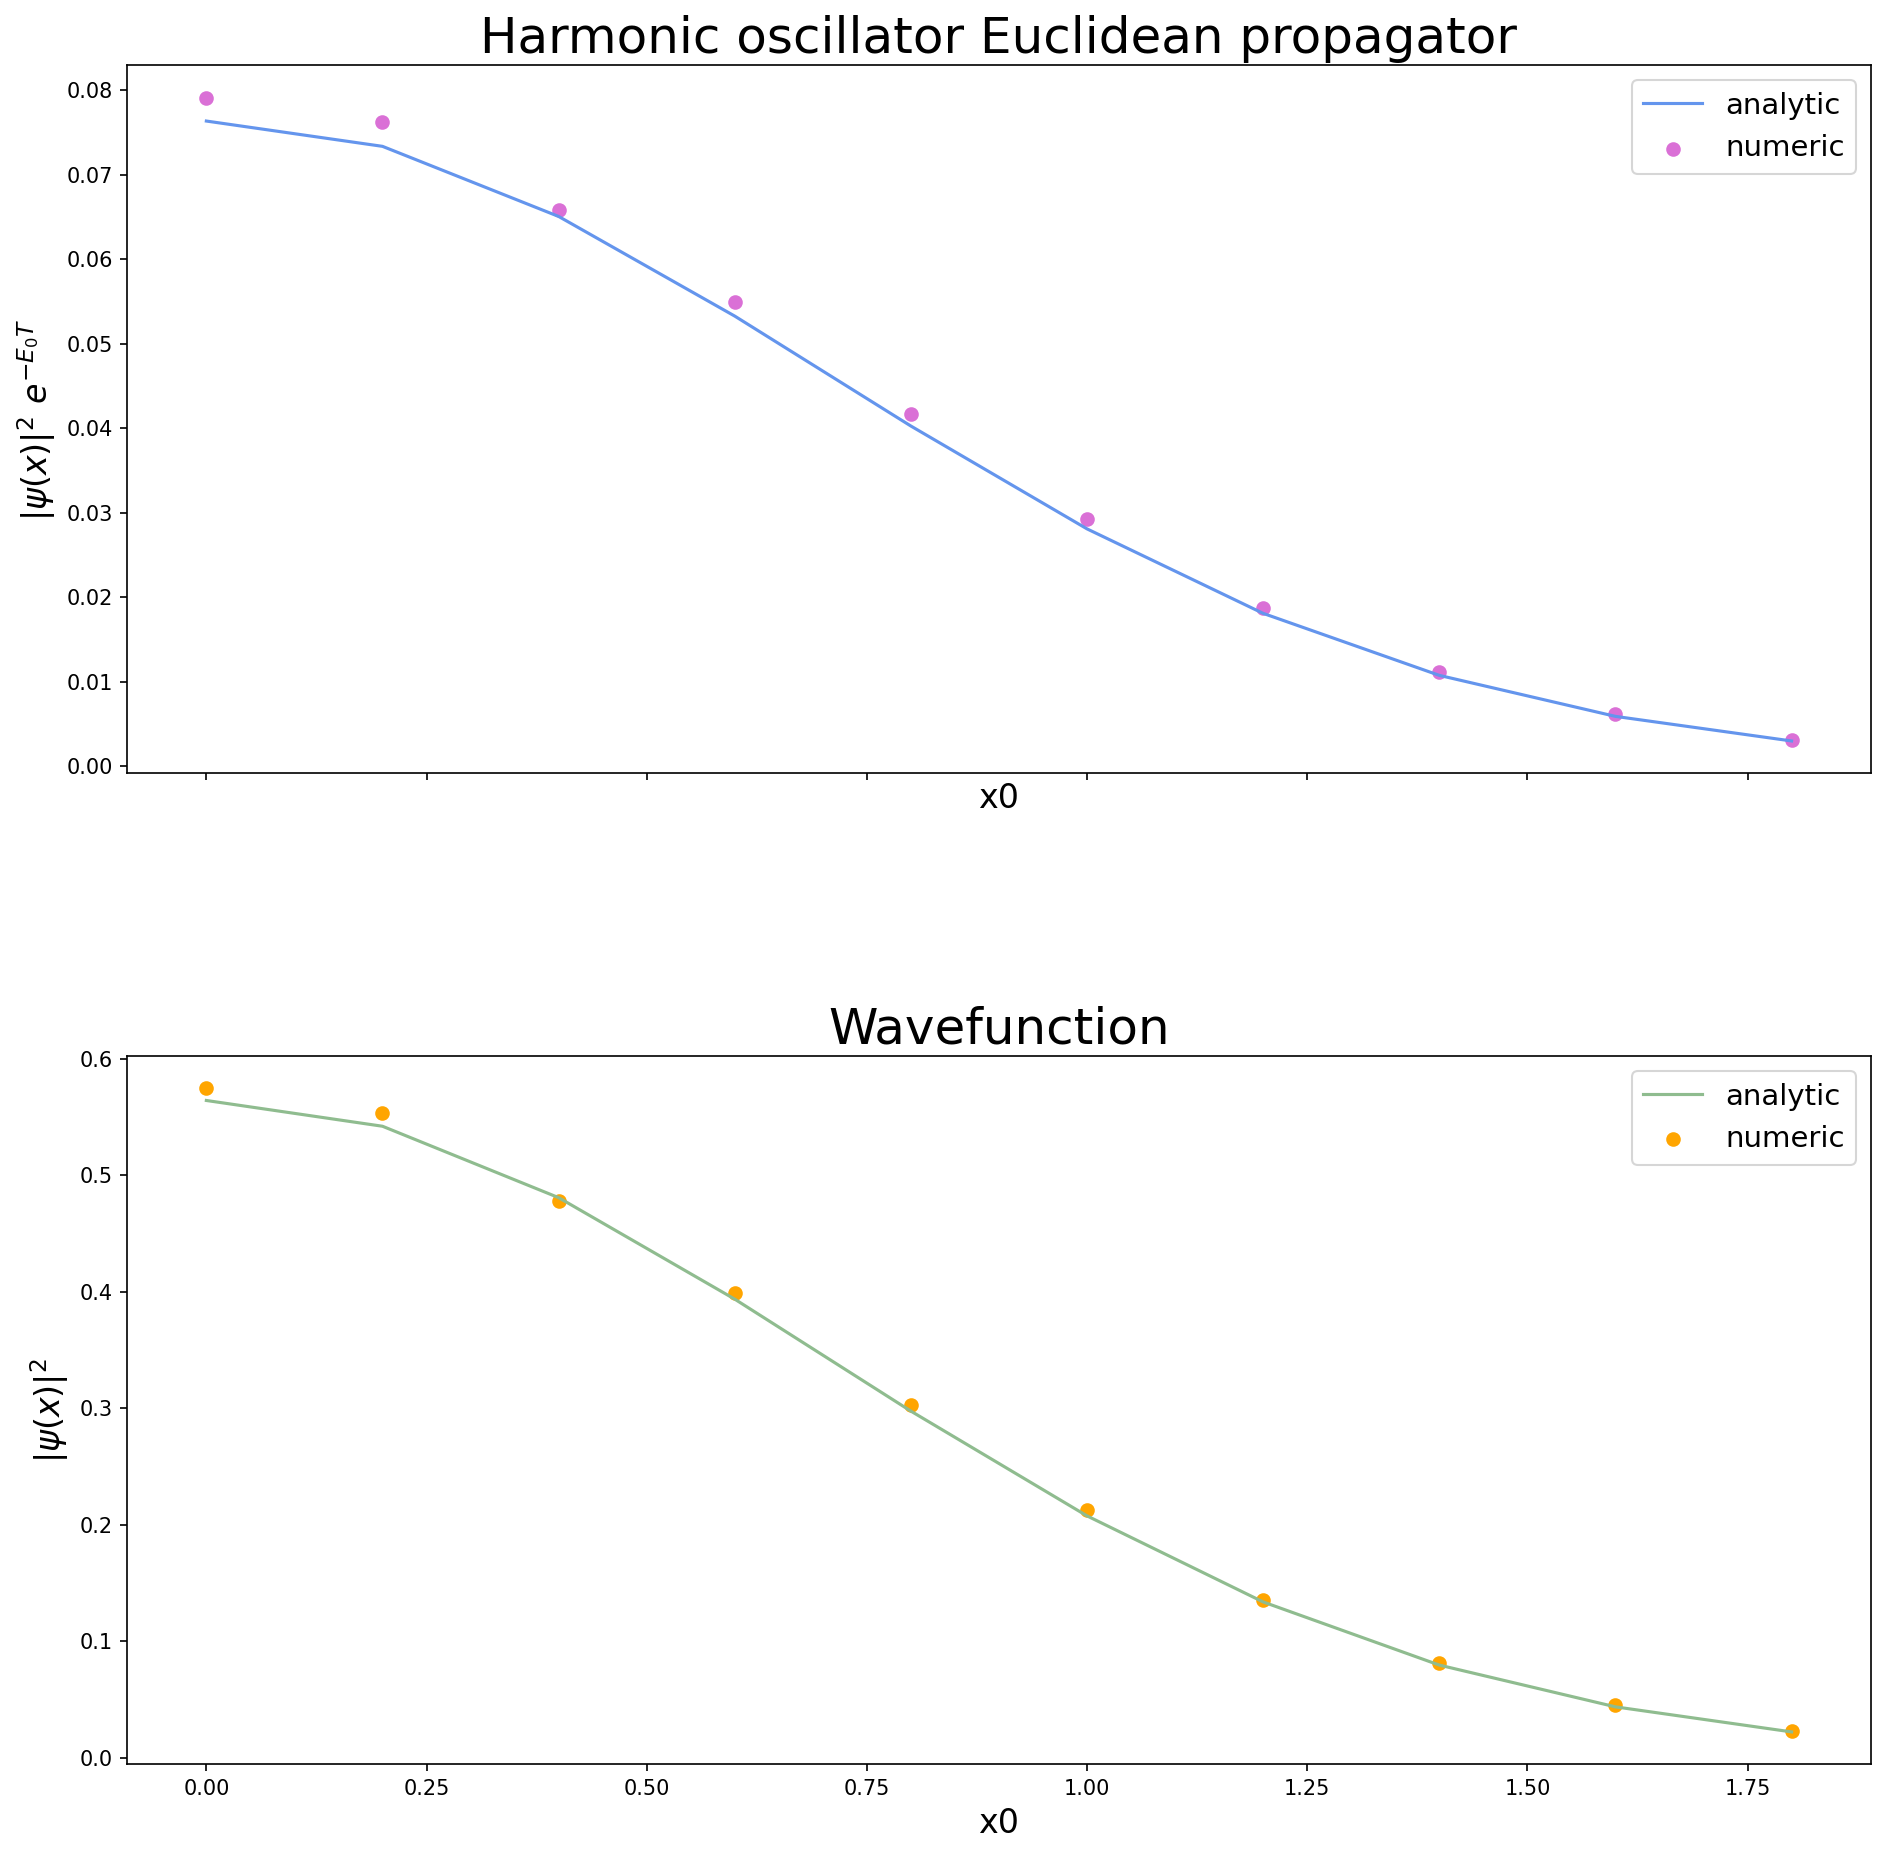

In [41]:
fig, (hox1, hox2) = plt.subplots(2, figsize=(15,15), sharex=True, dpi=150)

hox1.scatter(plotx,ploty_num_ho,label='numeric',color='orchid')
hox1.plot(plotx,ploty_an,label='analytic',color='cornflowerblue')
hox1.set_title('Harmonic oscillator Euclidean propagator',fontsize=24)
hox1.set_xlabel('x0',fontsize=16)
hox1.set_ylabel(r"$|\psi(x)|^2 \  e^{-E_0T}$",fontsize=16)
hox1.legend(loc='best',prop={"size":14})

hox2.scatter(plotx,plot_num_gs_ho,label='numeric',color='orange')
hox2.plot(plotx,ploty_an_gs,label='analytic',color='darkseagreen')
hox2.set_title('Wavefunction',fontsize=24)
hox2.set_xlabel('x0',fontsize=16)
hox2.set_ylabel(r"$|\psi(x)|^2$",fontsize=16)
hox2.legend(loc='best',prop={"size":14})

plt.subplots_adjust( hspace=0.4)

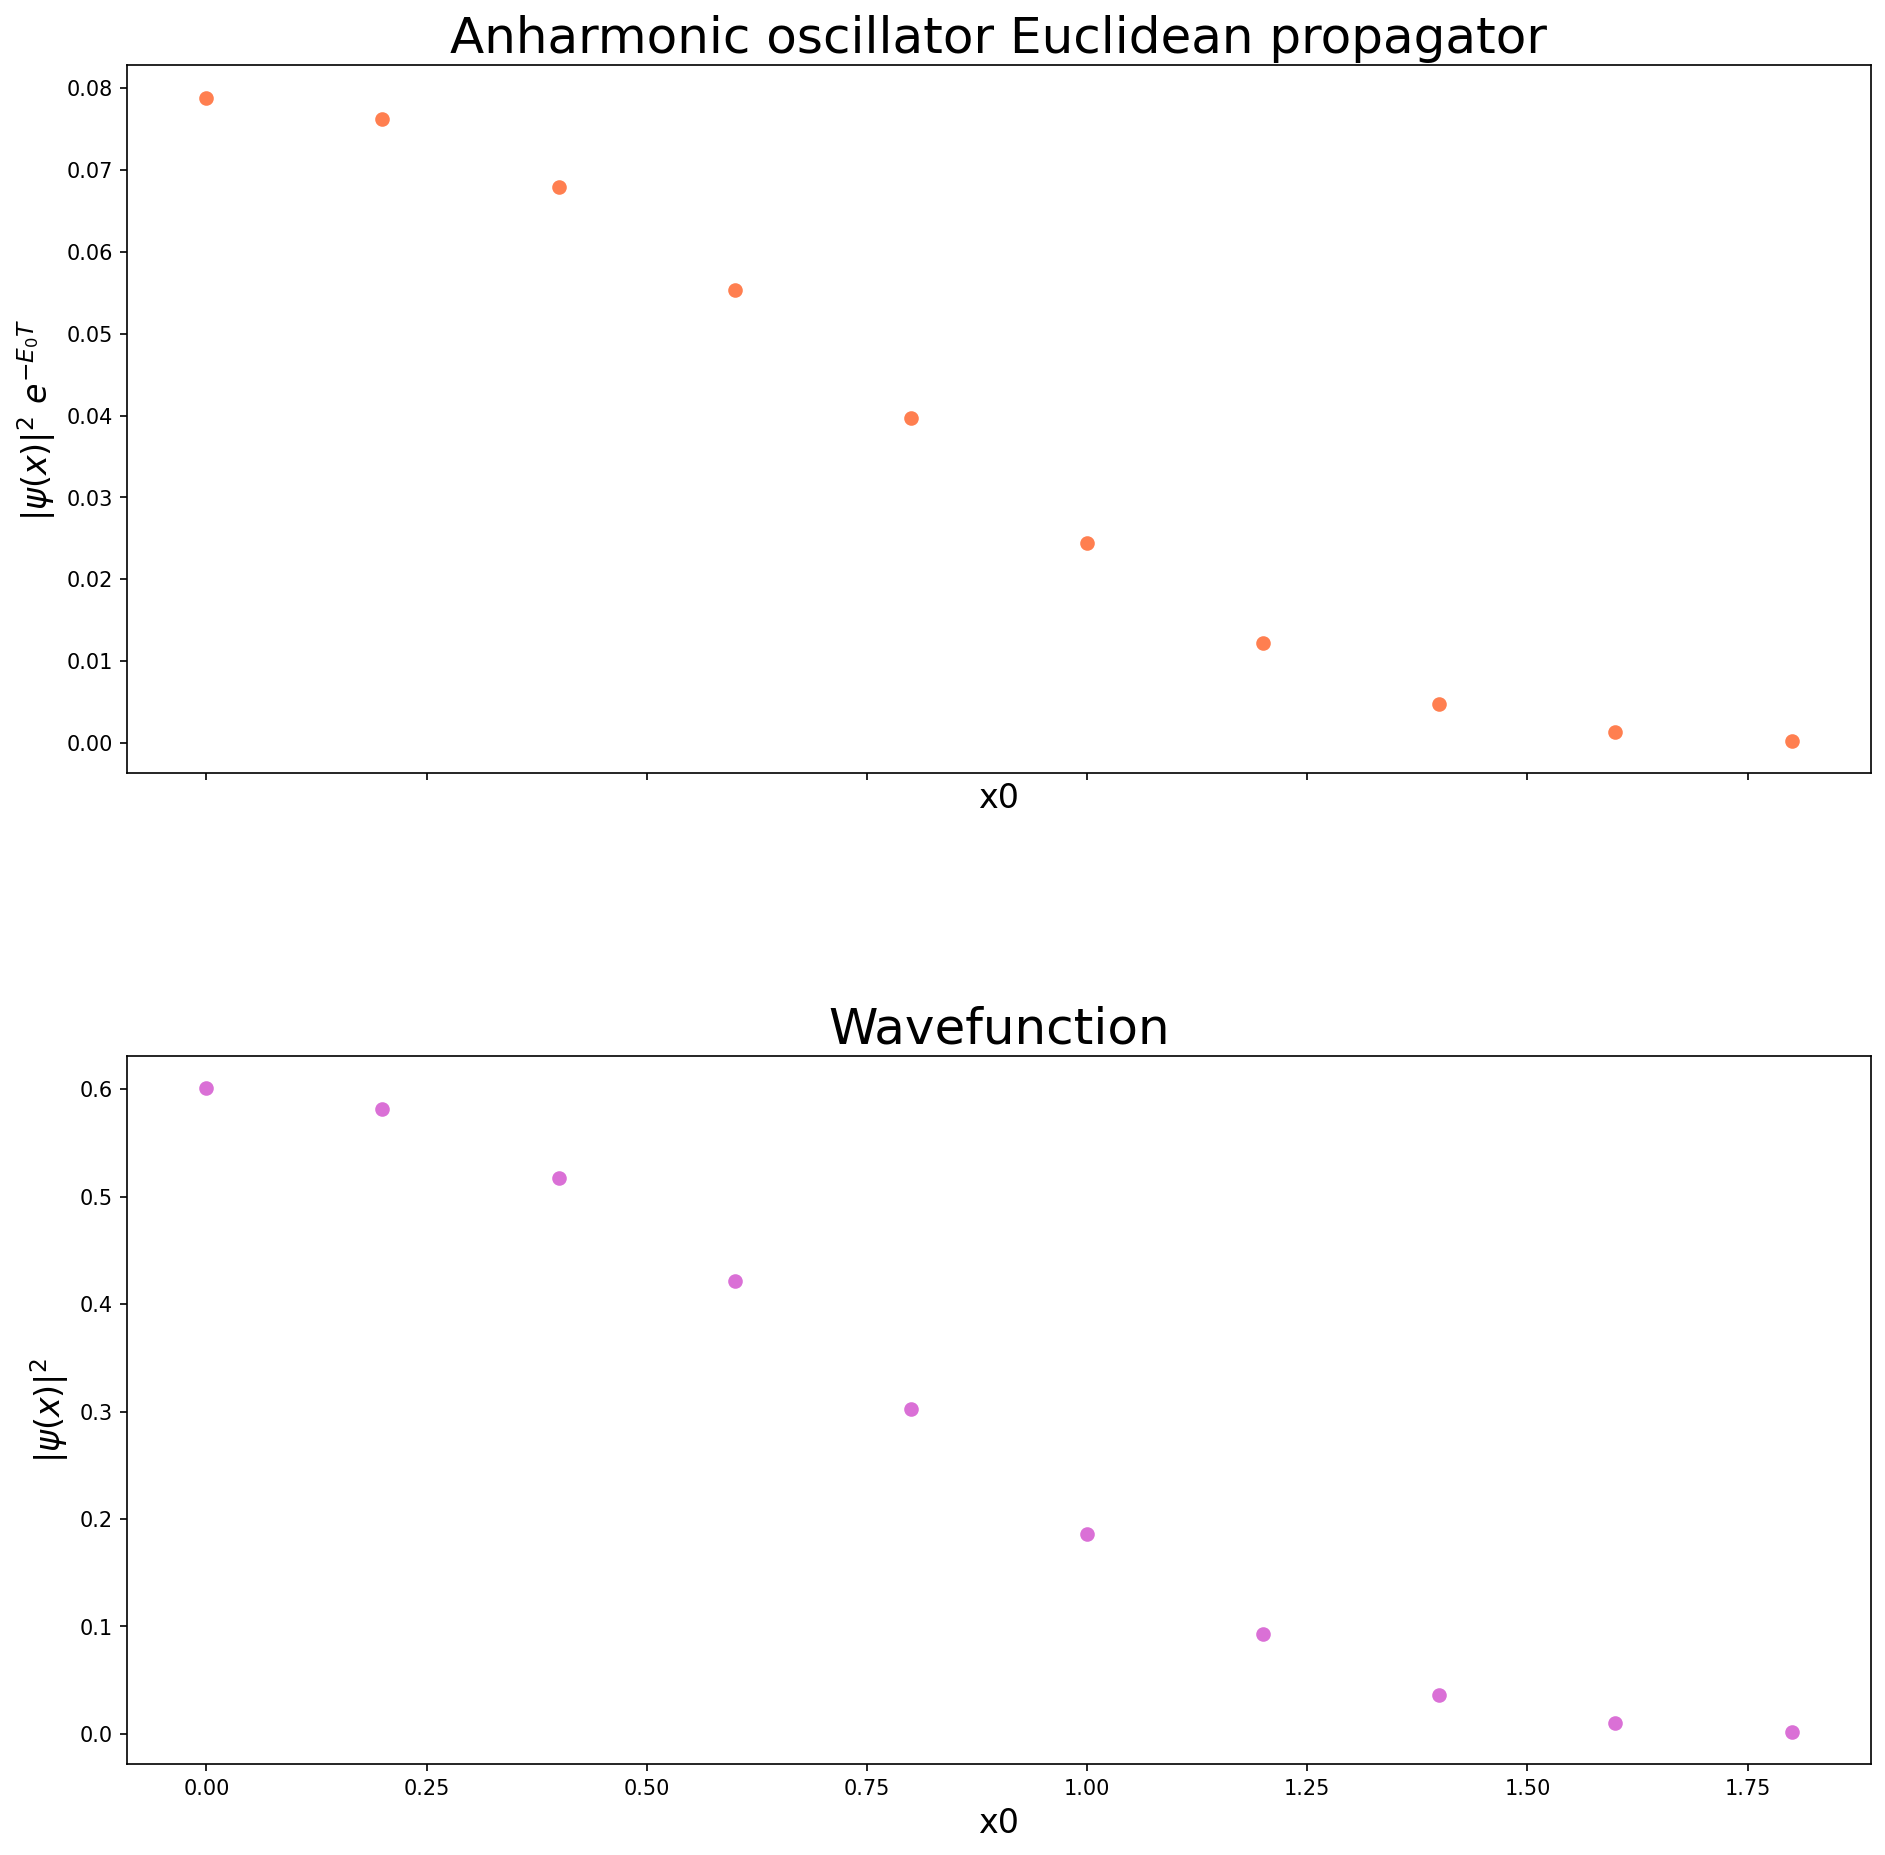

In [16]:
fig, (ahox1, ahox2) = plt.subplots(2, figsize=(15,15), sharex=True, dpi=150)
ahox1.scatter(plotx,ploty_num_aho,label='numeric',color='coral')
ahox1.set_title('Anharmonic oscillator Euclidean propagator',fontsize=24)
ahox1.set_xlabel('x0',fontsize=16)
ahox1.set_ylabel(r"$|\psi(x)|^2 \  e^{-E_0T}$",fontsize=16)

ahox2.scatter(plotx,plot_num_gs_aho,label='numeric',color='orchid')
ahox2.set_title('Wavefunction',fontsize=24)
ahox2.set_xlabel('x0',fontsize=16)
ahox2.set_ylabel(r"$|\psi(x)|^2$",fontsize=16)
plt.subplots_adjust(hspace=0.4)